In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#read the data and load it in a df
df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
hdi = pd.read_csv('./hdi.csv')

### Data understanding

In [2]:
#starting data (first 5 rows)
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Get info about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


In [4]:
# Get number of row and columns
num_row= df.shape[0]
num_col= df.shape[1]
print("number of rows: {}".format(num_row))
print("number of columns: {}".format(num_col))

number of rows: 51392
number of columns: 154


In [5]:
# Get column names
df.columns

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

In [6]:
# Get descrition of all columns
df.describe(include='all')

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
count,51392.000000,51392,51392,51392,51392,51392,51392,42841,44008,38922,...,31062,35047,34938,33033,34720,34536,34419,34612,12891.000000,2566.000000
unique,NaN,5,4,201,4,7,9,16,7,10,...,5,29,10,97,5,5,5,5,NaN,NaN
top,NaN,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,A few days each month,20 to 99 employees,...,Disagree,Male,A bachelor's degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,NaN,NaN
freq,NaN,36131,24801,11455,37543,36148,21609,21409,15454,8587,...,18200,31589,10175,23415,11257,16061,20955,14603,NaN,NaN
mean,25696.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56298.480641,33142.220468
std,14835.736854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39880.905277,30162.988829
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,12848.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26440.371839,4490.492484
50%,25696.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000.000000,29364.263691
75%,38544.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80000.000000,50403.225806


## Which country pays software developers the most

In [7]:
#check for null values in country and salary columns
print(df['Country'].isnull().sum())
print(df['Salary'].isnull().sum())

0
38501


In [8]:
#drop rows with missing salary values & rows where country = 'I prefer not to say'
df_drop_salary=df.dropna(subset=["Salary"],axis=0)
df_drop_final = df_drop_salary.drop(df_drop_salary[df_drop_salary['Country'] == 'I prefer not to say'].index)
df_drop_final

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.000000,NaN
14,15,Professional developer,"Yes, I program as a hobby",United Kingdom,No,Employed full-time,Professional degree,Computer engineering or electrical/electronics...,All or almost all the time (I'm full-time remote),"5,000 to 9,999 employees",...,Disagree,Male,High school,White or of European descent,Somewhat agree,Agree,Disagree,Agree,100000.000000,NaN
17,18,Professional developer,"Yes, both",United States,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),"1,000 to 4,999 employees",...,Disagree,Male,A master's degree,"Native American, Pacific Islander, or Indigeno...",Disagree,Agree,Disagree,Agree,130000.000000,NaN
18,19,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,A few days each month,"10,000 or more employees",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82500.000000,NaN
22,23,Professional developer,No,Israel,No,Employed full-time,Bachelor's degree,Computer engineering or electrical/electronics...,A few days each month,500 to 999 employees,...,Somewhat agree,Male,A bachelor's degree,White or of European descent,Strongly agree,Somewhat agree,Somewhat agree,Agree,100764.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51371,51372,Professional developer,No,Netherlands,No,Employed full-time,Bachelor's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,...,Disagree,Male,A bachelor's degree,White or of European descent,Disagree,Agree,Strongly disagree,Agree,74193.548387,NaN
51378,51379,Professional developer,"Yes, I contribute to open source projects",Cyprus,No,Employed part-time,Secondary school,NaN,All or almost all the time (I'm full-time remote),Fewer than 10 employees,...,Strongly disagree,Male,A doctoral degree,NaN,Somewhat agree,Strongly agree,Strongly disagree,Strongly agree,107526.881720,NaN
51382,51383,Professional developer,"Yes, I program as a hobby",France,No,Employed full-time,Master's degree,Computer science or software engineering,Never,100 to 499 employees,...,Disagree,Male,A master's degree,White or of European descent,Agree,Agree,Disagree,Somewhat agree,32258.064516,NaN
51387,51388,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,A social science,A few days each month,100 to 499 employees,...,Disagree,Male,A doctoral degree,East Asian; White or of European descent,Disagree,Agree,Strongly disagree,Strongly agree,58000.000000,NaN


In [9]:
#create new df where only Country and Salary info are kept
new_df = df_drop_final[['Country', 'Salary']]
new_df

,Country,Salary
2,United Kingdom,113750.000000
14,United Kingdom,100000.000000
17,United States,130000.000000
18,United States,82500.000000
22,Israel,100764.000000
...,...,...
51371,Netherlands,74193.548387
51378,Cyprus,107526.881720
51382,France,32258.064516
51387,United States,58000.000000


In [10]:
pd.set_option('display.max_rows', None)
#Group by country, calculate salary mean for each country, and sort them out
series=new_df.groupby(['Country']).mean()['Salary'].sort_values()
mean_salary_df=series.to_frame()
mean_salary_df

,Salary
Country,
Cambodia,500.000000
Cuba,560.000000
Zimbabwe,700.000000
Yemen,1000.000000
Kazakhstan,1000.000000
Azerbaidjan,3500.000000
Syria,4250.000000
Zaire,4800.000000
Mongolia,6000.000000


## List of countries with very high HDI

In [11]:
#drop rows with missing hdicode values
hdi_drop=hdi.dropna(subset=["hdicode"],axis=0)

#only keep rows where hdicode is very high
    # Create a boolean series
boolean_series = hdi_drop['hdicode'] == 'Very High'
    # Use the boolean series as a filter on the DataFrame using .loc
hdi_drop_final = hdi_drop.loc[boolean_series]

#converts df with countries with hdicode- 'Very high' to a list
country_list = hdi_drop_final['country'].tolist()
country_list

['Andorra',
 'United Arab Emirates',
 'Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Bahrain',
 'Bahamas',
 'Belarus',
 'Brunei Darussalam',
 'Canada',
 'Switzerland',
 'Chile',
 'Costa Rica',
 'Cyprus',
 'Czechia',
 'Germany',
 'Denmark',
 'Spain',
 'Estonia',
 'Finland',
 'France',
 'United Kingdom',
 'Georgia',
 'Greece',
 'Hong Kong, China (SAR)',
 'Croatia',
 'Hungary',
 'Ireland',
 'Iceland',
 'Israel',
 'Italy',
 'Japan',
 'Kazakhstan',
 'Korea (Republic of)',
 'Kuwait',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Latvia',
 'Malta',
 'Montenegro',
 'Mauritius',
 'Malaysia',
 'Netherlands',
 'Norway',
 'New Zealand',
 'Oman',
 'Panama',
 'Poland',
 'Portugal',
 'Qatar',
 'Romania',
 'Russian Federation',
 'Saudi Arabia',
 'Singapore',
 'San Marino',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'Sweden',
 'Thailand',
 'Trinidad and Tobago',
 'Turkey',
 'Uruguay',
 'United States']

## In which country with very high HDI do software developers get highest salary

In [12]:
#only keep rows for countries with very high HDI
filtered_mean_salary_df = mean_salary_df[mean_salary_df.index.isin(country_list)]
filtered_mean_salary_df

,Salary
Country,
Kazakhstan,1000.000000
Montenegro,10537.634409
Georgia,11452.043011
Malaysia,14321.113956
Chile,14986.116690
Qatar,17618.558215
Turkey,18412.469412
Russian Federation,18442.294414
Lithuania,18726.490714


In [13]:
#remove countries that pay less than $50k
filtered_mean_salary_cutoff_df = filtered_mean_salary_df[filtered_mean_salary_df["Salary"]>40000]
filtered_mean_salary_cutoff_df

,Salary
Country,
Japan,40795.413622
Singapore,42487.089833
Finland,42875.560758
France,42879.033385
Uruguay,44224.203822
Austria,45299.012856
Luxembourg,45985.663082
Thailand,47555.494624
Sweden,48764.966524


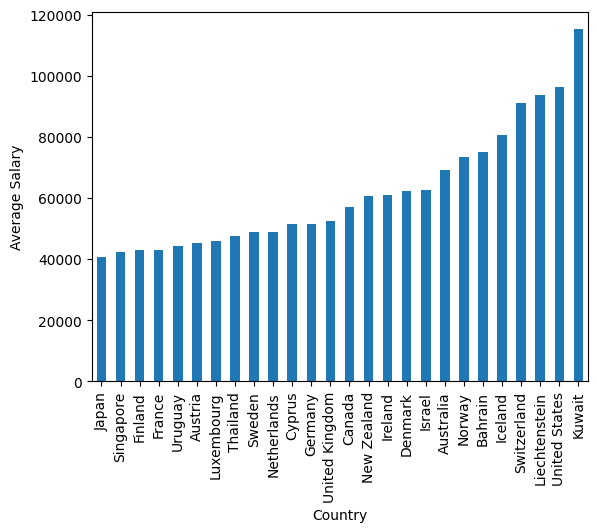

In [14]:
# plot Avergae salary per country (only for countries with very high HDI that pay more than $50k)
filtered_mean_salary_cutoff_df.plot.bar(legend=None)
plt.xlabel("Country")
plt.ylabel("Average Salary")
plt.show()